In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# ML Libraries
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, silhouette_score, classification_report

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:

df = pd.read_csv("https://raw.githubusercontent.com/Durgeshsingh12712/Data-All/refs/heads/main/Unified%20Dataset/customer_support_tickets.csv")
df


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaN,NaN,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaN,NaN,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [4]:
df.shape

(8469, 17)

In [5]:
df.memory_usage(deep=True).sum()

10385165

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [7]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [8]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

In [10]:
df_processed = df.copy()

In [11]:
df_processed["description_filled"] = df_processed.apply(
        lambda row: row["Ticket Description"].replace(
            "{product_purchased}", str(row["Product Purchased"])
        ), axis=1
    )


In [12]:
feature_df = df_processed[['description_filled', 'Ticket Type', 'Ticket Subject']].copy()

In [13]:
# One-hot encode categorical variables
ticket_type_encoded = pd.get_dummies(
    feature_df['Ticket Type'], 
    prefix='TicketType', 
    drop_first=True, 
    dtype=int
)
    
ticket_subject_encoded = pd.get_dummies(
    feature_df['Ticket Subject'], 
    prefix='TicketSubject', 
    drop_first=True, 
    dtype=int
)


In [14]:
categorical_features = pd.concat([ticket_type_encoded, ticket_subject_encoded], axis=1)

In [15]:
categorical_features.shape

(8469, 19)

In [16]:
def extract_text_features(descriptions, method='count', max_features=1000):
    """Extract features from text descriptions"""
    
    if method == 'count':
        vectorizer = CountVectorizer(max_features=max_features, stop_words='english')
    elif method == 'tfidf':
        vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english')
    
    # Fit and transform text data
    text_features = vectorizer.fit_transform(descriptions).toarray()
    
    # Create DataFrame
    feature_names = [f'text_feature_{i}' for i in range(text_features.shape[1])]
    text_df = pd.DataFrame(text_features, columns=feature_names, index=categorical_features.index)
    
    print(f"Text features extracted: {text_features.shape}")
    
    return text_df, vectorizer

# Extract text features using TF-IDF (more efficient than CountVectorizer)
text_features_df, text_vectorizer = extract_text_features(
    feature_df['description_filled'], 
    method='tfidf', 
    max_features=500
)

Text features extracted: (8469, 500)


In [17]:
def create_feature_matrix(categorical_features, text_features_df=None):
    """Combine all features into final matrix"""
    
    if text_features_df is not None:
        # Combine categorical and text features
        X = pd.concat([categorical_features, text_features_df], axis=1)
        print(f"Combined feature matrix shape: {X.shape}")
    else:
        X = categorical_features
        print(f"Categorical-only feature matrix shape: {X.shape}")
    
    return X

X_categorical_only = create_feature_matrix(categorical_features)
X_with_text = create_feature_matrix(categorical_features, text_features_df)

Categorical-only feature matrix shape: (8469, 19)
Combined feature matrix shape: (8469, 519)


In [18]:
def prepare_target_variable(df):
    """Encode target variable for classification"""
    
    le = LabelEncoder()
    y = le.fit_transform(df['Ticket Priority'])
    
    print("TARGET VARIABLE DISTRIBUTION")
    print("=" * 40)
    target_dist = pd.Series(y).value_counts().sort_index()
    priority_labels = le.classes_
    
    for i, count in target_dist.items():
        print(f"{priority_labels[i]}: {count} ({count/len(y)*100:.1f}%)")
    
    return y, le

y, label_encoder = prepare_target_variable(df_processed)

TARGET VARIABLE DISTRIBUTION
Critical: 2129 (25.1%)
High: 2085 (24.6%)
Low: 2063 (24.4%)
Medium: 2192 (25.9%)


In [19]:
def evaluate_classification_models(X, y, test_size=0.2, random_state=42):
    """Train and evaluate classification models"""
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=random_state,
        class_weight='balanced'
    )
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Model Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    return rf_model, accuracy, (X_train, X_test, y_train, y_test)

print("EVALUATING CATEGORICAL-ONLY MODEL")
print("=" * 50)
model_cat, acc_cat, splits_cat = evaluate_classification_models(X_categorical_only, y)

print("\nEVALUATING MODEL WITH TEXT FEATURES")
print("=" * 50)
model_text, acc_text, splits_text = evaluate_classification_models(X_with_text, y)

EVALUATING CATEGORICAL-ONLY MODEL
Model Accuracy: 0.2538

Classification Report:
              precision    recall  f1-score   support

    Critical       0.27      0.20      0.23       426
        High       0.26      0.27      0.26       417
         Low       0.24      0.20      0.22       413
      Medium       0.25      0.34      0.29       438

    accuracy                           0.25      1694
   macro avg       0.25      0.25      0.25      1694
weighted avg       0.25      0.25      0.25      1694


EVALUATING MODEL WITH TEXT FEATURES
Model Accuracy: 0.2462

Classification Report:
              precision    recall  f1-score   support

    Critical       0.25      0.28      0.26       426
        High       0.23      0.26      0.25       417
         Low       0.28      0.25      0.26       413
      Medium       0.23      0.19      0.21       438

    accuracy                           0.25      1694
   macro avg       0.25      0.25      0.25      1694
weighted avg       0

CLUSTERING ANALYSIS
PCA completed. Explained variance ratio: 0.698


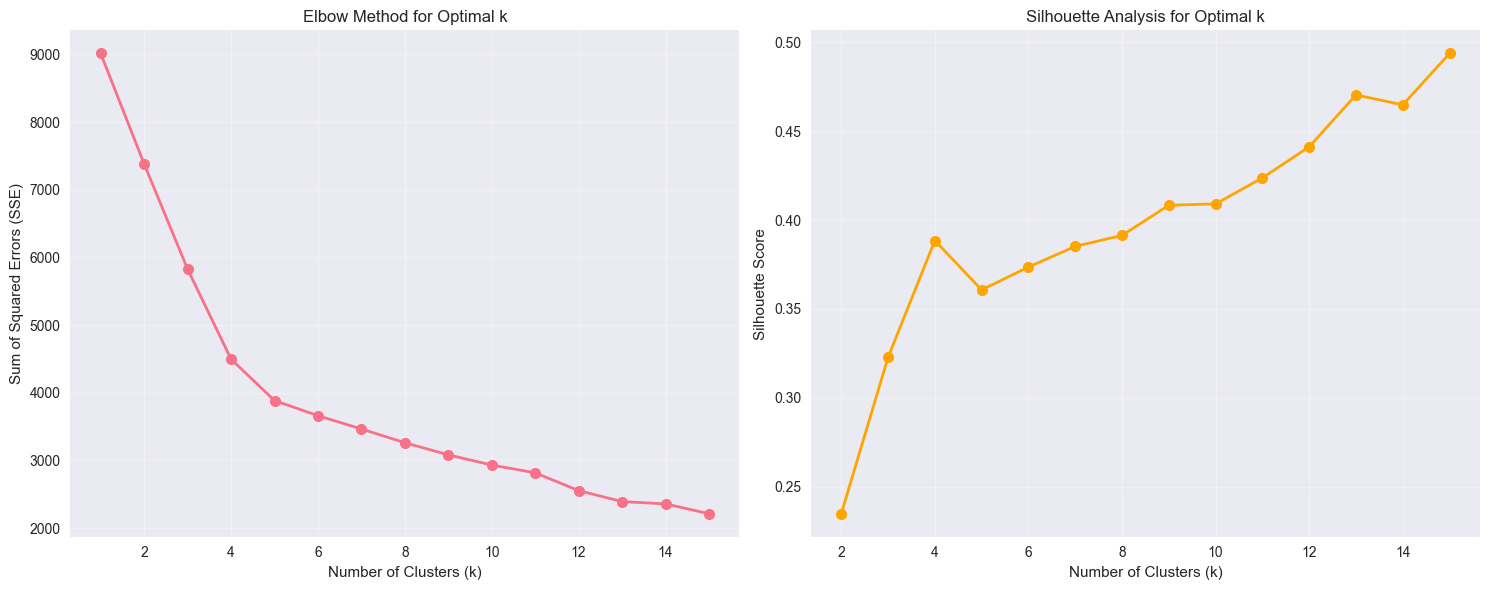

 Optimal number of clusters (based on silhouette score): 15
Final clustering completed with 15 clusters


In [34]:
def find_optimal_clusters(X, max_k=20):
    """Find optimal number of clusters using elbow method and silhouette score"""
    
    k_range = range(1, max_k + 1)
    sse_scores = []
    silhouette_scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        sse_scores.append(kmeans.inertia_)
        
        if k > 1:
            labels = kmeans.labels_
            silhouette_scores.append(silhouette_score(X, labels))
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    ax1.plot(k_range, sse_scores, marker='o', linewidth=2, markersize=8)
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Sum of Squared Errors (SSE)')
    ax1.set_title('Elbow Method for Optimal k')
    ax1.grid(True, alpha=0.3)
    
    k_range_sil = range(2, max_k + 1)
    ax2.plot(k_range_sil, silhouette_scores, marker='o', linewidth=2, markersize=8, color='orange')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis for Optimal k')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    optimal_k = k_range_sil[np.argmax(silhouette_scores)]
    print(f" Optimal number of clusters (based on silhouette score): {optimal_k}")
    
    return optimal_k, sse_scores, silhouette_scores

def perform_clustering_analysis(X, optimal_k=None):
    """Perform clustering analysis with dimensionality reduction"""

    pca = PCA(n_components=10, random_state=42)
    X_pca = pca.fit_transform(X)
    
    pca_columns = [f'PCA_{i+1}' for i in range(X_pca.shape[1])]
    pca_df = pd.DataFrame(X_pca, columns=pca_columns)
    
    print(f"PCA completed. Explained variance ratio: {pca.explained_variance_ratio_.sum():.3f}")
    
    if optimal_k is None:
        optimal_k, _, _ = find_optimal_clusters(pca_df, max_k=15)
    
    final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    cluster_labels = final_kmeans.fit_predict(pca_df)
    
    df_with_clusters = df_processed.copy()
    df_with_clusters['Cluster'] = cluster_labels
    
    print(f"Final clustering completed with {optimal_k} clusters")
    
    return df_with_clusters, pca_df, cluster_labels, final_kmeans

print("CLUSTERING ANALYSIS")
print("=" * 50)
df_clustered, pca_df, clusters, kmeans_model = perform_clustering_analysis(X_categorical_only)

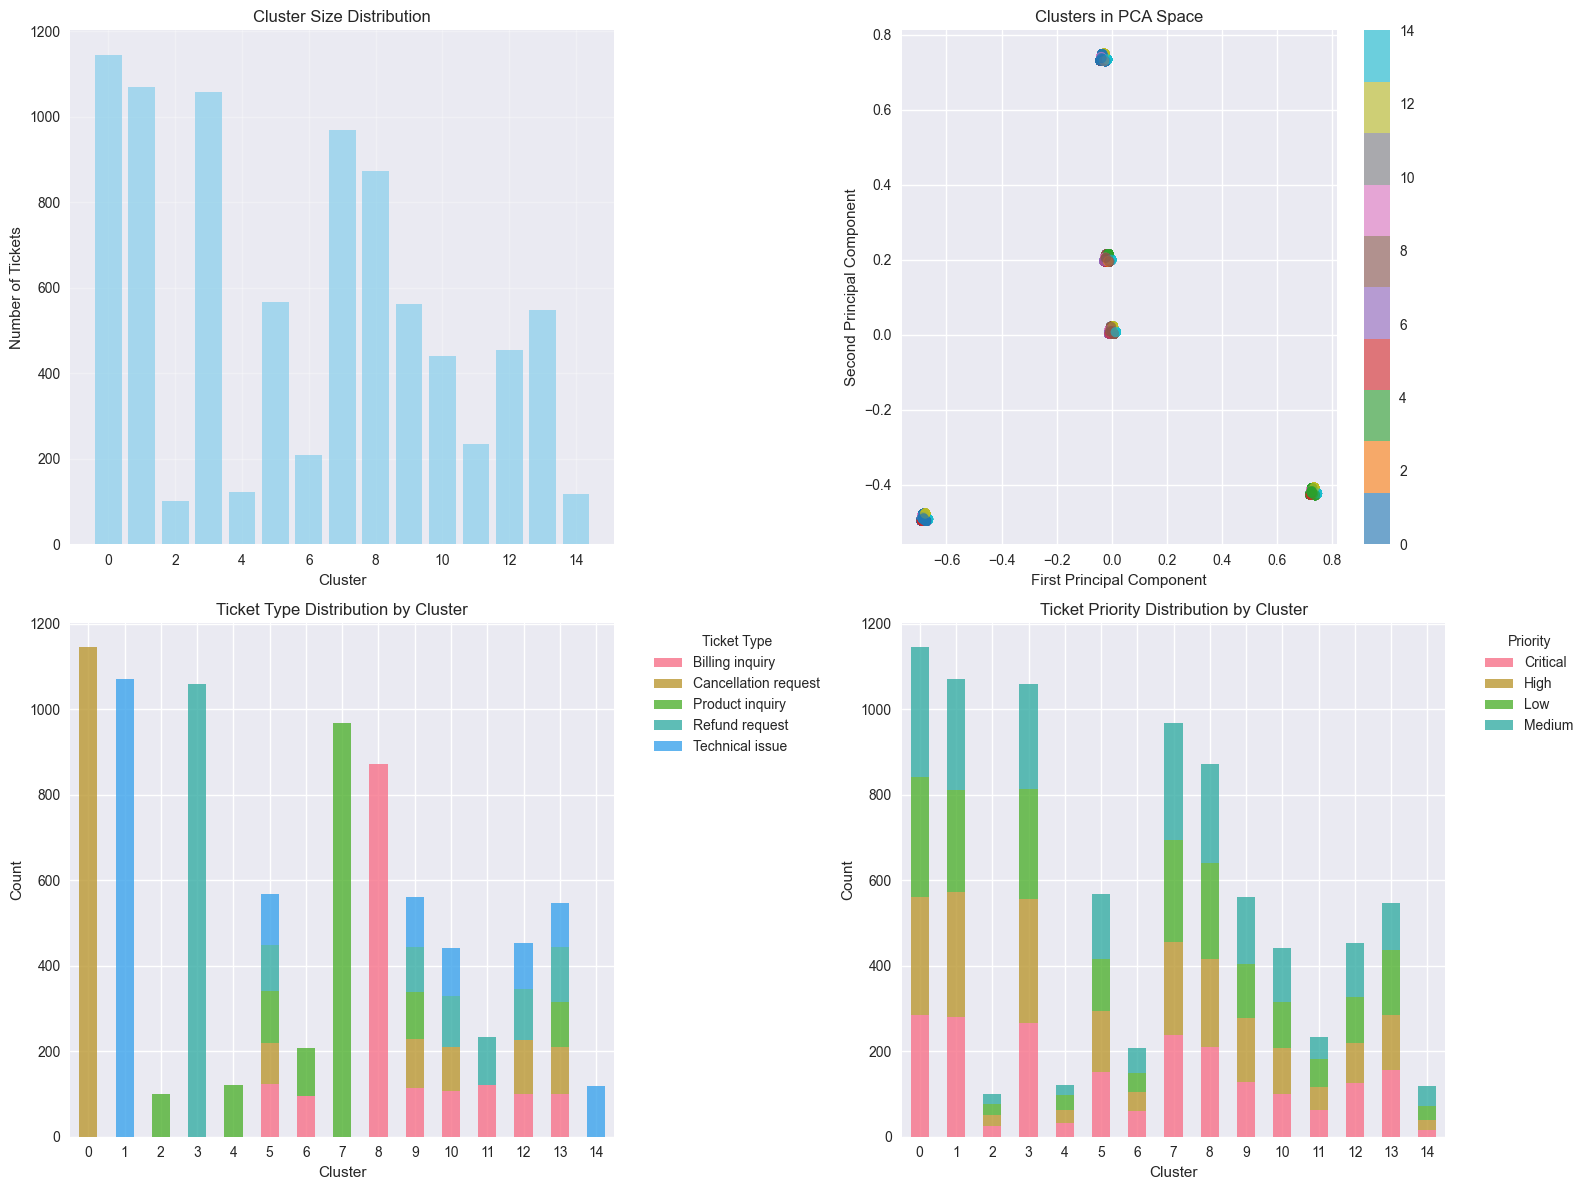

In [41]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

cluster_counts = pd.Series(clusters).value_counts().sort_index()
ax1.bar(cluster_counts.index, cluster_counts.values, color='skyblue', alpha=0.7)
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Number of Tickets')
ax1.set_title('Cluster Size Distribution')
ax1.grid(True, alpha=0.3)

scatter = ax2.scatter(pca_df['PCA_1'], pca_df['PCA_2'], c=clusters, cmap='tab10', alpha=0.6)
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
ax2.set_title('Clusters in PCA Space')
plt.colorbar(scatter, ax=ax2)

cluster_ticket_type = pd.crosstab(df_clustered['Cluster'], df_clustered['Ticket Type'])
cluster_ticket_type.plot(kind='bar', stacked=True, ax=ax3, alpha=0.8)
ax3.set_xlabel('Cluster')
ax3.set_ylabel('Count')
ax3.set_title('Ticket Type Distribution by Cluster')
ax3.legend(title='Ticket Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.tick_params(axis='x', rotation=0)

cluster_priority = pd.crosstab(df_clustered['Cluster'], df_clustered['Ticket Priority'])
cluster_priority.plot(kind='bar', stacked=True, ax=ax4, alpha=0.8)
ax4.set_xlabel('Cluster')
ax4.set_ylabel('Count')
ax4.set_title('Ticket Priority Distribution by Cluster')
ax4.legend(title='Priority', bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.tick_params(axis='x', rotation=0)
    
plt.tight_layout()
plt.show()

In [42]:
print(" COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 60)
    
print("\n CLASSIFICATION RESULTS:")
print(f"  • Categorical features only: {acc_cat:.1%} accuracy")
print(f"  • With text features: {acc_text:.1%} accuracy")
print(f"  • Improvement with text: {((acc_text - acc_cat) / acc_cat * 100):+.1f}%")
    
print("\n CLUSTERING INSIGHTS:")
n_clusters = df_clustered['Cluster'].nunique()
print(f"  • Number of clusters identified: {n_clusters}")
    
print("\nTICKET DISTRIBUTION:")
print(f"  • Total tickets analyzed: {len(df_clustered):,}")
print(f"  • Ticket types: {df_clustered['Ticket Type'].nunique()}")
print(f"  • Ticket subjects: {df_clustered['Ticket Subject'].nunique()}")
print(f"  • Priority levels: {df_clustered['Ticket Priority'].nunique()}")

print("\nTOP ISSUES BY CLUSTER:")
for cluster_id in sorted(df_clustered['Cluster'].unique()):
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    top_subject = cluster_data['Ticket Subject'].value_counts().index[0]
    top_type = cluster_data['Ticket Type'].value_counts().index[0]
    count = len(cluster_data)
    print(f"  • Cluster {cluster_id} ({count:,} tickets): {top_subject} ({top_type})")


 COMPREHENSIVE ANALYSIS SUMMARY

 CLASSIFICATION RESULTS:
  • Categorical features only: 25.4% accuracy
  • With text features: 24.6% accuracy
  • Improvement with text: -3.0%

 CLUSTERING INSIGHTS:
  • Number of clusters identified: 15

TICKET DISTRIBUTION:
  • Total tickets analyzed: 8,469
  • Ticket types: 5
  • Ticket subjects: 16
  • Priority levels: 4

TOP ISSUES BY CLUSTER:
  • Cluster 0 (1,145 tickets): Data loss (Cancellation request)
  • Cluster 1 (1,070 tickets): Network problem (Technical issue)
  • Cluster 2 (101 tickets): Battery life (Product inquiry)
  • Cluster 3 (1,059 tickets): Installation support (Refund request)
  • Cluster 4 (122 tickets): Refund request (Product inquiry)
  • Cluster 5 (567 tickets): Product compatibility (Billing inquiry)
  • Cluster 6 (208 tickets): Network problem (Product inquiry)
  • Cluster 7 (969 tickets): Software bug (Product inquiry)
  • Cluster 8 (873 tickets): Installation support (Billing inquiry)
  • Cluster 9 (561 tickets): Deliver